In [1]:
import pandas as pd
from datetime import datetime
from pytz import all_timezones
import pvlib

In [2]:
tmy_acc = pd.read_excel('./TMY.xlsx')
tmy_acc_metadata = tmy_acc.iloc[:7]
tmy_acc = tmy_acc.iloc[7:]
tmy_acc.columns = tmy_acc.iloc[0]#columnsy_acc[['Year','Month','Day','Hour','Minute','Second','P [mbar]','T [ºC]','DNI [W/m2]','Rel Hum [%]','Wind speed [m/s]']]
tmy_acc = tmy_acc.iloc[1:]

In [3]:
tmy_acc['Date'] = (tmy_acc['Year'].apply(str)+
                   tmy_acc['Month'].apply(str).apply(lambda x: x.zfill(2))+
                   tmy_acc['Day'].apply(str).apply(lambda x: x.zfill(2))+' '+
                   tmy_acc['Hour'].apply(str).apply(lambda x: x.zfill(2))+
                   tmy_acc['Minute'].apply(str).apply(lambda x: x.zfill(2)))

tmy_acc['Date'] = pd.to_datetime(tmy_acc['Date'])
tmy_acc['date_timestamp'] = tmy_acc['Date'].apply(lambda x: pd.Timestamp(x,tz='America/Santiago'))
start_date = tmy_acc['Date'].iloc[0]
date_seconds = []
for ii in range(len(tmy_acc['Date'])):
    date_seconds.append(int( (tmy_acc['Date'].iloc[ii]-start_date).total_seconds() ) )
tmy_acc['date_seconds'] = date_seconds

In [353]:
tmy_acc.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second', 'P [mbar]',
       'T [ºC]', 'DNI [W/m2]', 'Rel Hum [%]', 'Wind speed [m/s]', 'Date',
       'date_timestamp', 'date_seconds'],
      dtype='object', name=7)

In [7]:
tmy_acc2ome = tmy_acc.loc[:,['date_seconds','DNI [W/m2]','T [ºC]','Rel Hum [%]','P [mbar]','Wind speed [m/s]']]
tmy_acc2ome.columns = ['seconds','DNI','Tdry','RH','Pres','Wspd']
## inventa datos de GHI,DHI,Tdew,Wdir,Albedo
## inventa datos de GHI,DHI,Tdew,Wdir,Albedo
tmy_acc2ome['GHI'] = tmy_acc2ome.loc[:,'DNI']*0.8
tmy_acc2ome['DHI'] = tmy_acc2ome.loc[:,'DNI']*0.07
tmy_acc2ome['Tdew'] = tmy_acc2ome.loc[:,'Tdry']-20
tmy_acc2ome['Wdir'] = 100
tmy_acc2ome['Albedo'] = 0.4
## inventa datos de GHI,DHI,Tdew,Wdir,Albedo
## inventa datos de GHI,DHI,Tdew,Wdir,Albedo

##la funcion DataTable multiplica el valor de presión 
tmy_acc2ome = tmy_acc2ome.loc[:,['seconds','GHI','DNI','DHI','Tdry','Tdew','RH','Pres','Wspd','Wdir','Albedo']]


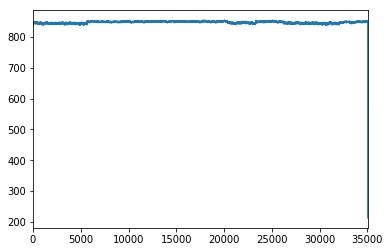

In [16]:
tmy_acc2ome['Pres'].plot()

In [8]:
len_x=len(tmy_acc2ome.index)
len_y=len(tmy_acc2ome.columns)
motab_aslist = []
motab_aslist.append('#1\n')
motab_aslist.append("double data(%d,%d)\n"%(len_x,len_y))
for ii in range(len_x):
    motab_aslist.append( ', '.join( list(tmy_acc2ome.iloc[ii].apply(str)) )+'\n' )

In [18]:
with open('./tmy_acc_mod.motab','w') as f:
    for el in motab_aslist:
        f.write(el)

In [19]:
for el in motab_aslist:
    print(el)

#1

double data(35040,11)

0, 0.0, 0, 0.0, 11.649999999999999, -8.350000000000001, 48.85, 846.9166666666666, 1.633333333333333, 100, 0.4

900, 0.0, 0, 0.0, 11.437499999999998, -8.562500000000002, 48.97916666666667, 846.6041666666666, 1.5916666666666666, 100, 0.4

1800, 0.0, 0, 0.0, 11.224999999999998, -8.775000000000002, 49.108333333333334, 846.2916666666666, 1.5499999999999998, 100, 0.4

2700, 0.0, 0, 0.0, 11.0125, -8.9875, 49.2375, 845.9791666666666, 1.5083333333333333, 100, 0.4

3600, 0.0, 0, 0.0, 10.799999999999999, -9.200000000000001, 49.36666666666667, 845.6666666666666, 1.4666666666666668, 100, 0.4

4500, 0.0, 0, 0.0, 10.579166666666666, -9.420833333333334, 49.545833333333334, 845.1083333333333, 1.4333333333333333, 100, 0.4

5400, 0.0, 0, 0.0, 10.358333333333334, -9.641666666666666, 49.725, 844.55, 1.4, 100, 0.4

6300, 0.0, 0, 0.0, 10.137500000000001, -9.862499999999999, 49.90416666666667, 843.9916666666667, 1.3666666666666667, 100, 0.4

7200, 0.0, 0, 0.0, 9.916666666666668, -10

2154600, 0.0, 0, 0.0, 10.641666666666666, -9.358333333333334, 92.68333333333332, 845.1083333333333, 0.8666666666666667, 100, 0.4

2155500, 0.0, 0, 0.0, 10.395833333333332, -9.604166666666668, 94.76666666666665, 845.0708333333334, 0.8166666666666668, 100, 0.4

2156400, 0.0, 0, 0.0, 10.149999999999999, -9.850000000000001, 96.84999999999998, 845.0333333333334, 0.7666666666666667, 100, 0.4

2157300, 0.0, 0, 0.0, 9.941666666666666, -10.058333333333334, 97.61249999999998, 845.7, 0.75, 100, 0.4

2158200, 0.0, 0, 0.0, 9.733333333333333, -10.266666666666667, 98.37499999999999, 846.3666666666667, 0.7333333333333334, 100, 0.4

2159100, 0.0, 0, 0.0, 9.524999999999999, -10.475000000000001, 99.13749999999999, 847.0333333333333, 0.7166666666666668, 100, 0.4

2160000, 0.0, 0, 0.0, 9.316666666666666, -10.683333333333334, 99.89999999999999, 847.6999999999999, 0.7000000000000001, 100, 0.4

2160900, 0.0, 0, 0.0, 9.145833333333332, -10.854166666666668, 99.89999999999999, 847.5083333333332, 0.65, 100, 0.4



4285800, 672.4000000000001, 840.5, 58.83500000000001, 28.4, 8.399999999999999, 17.333333333333332, 840.025, 6.066666666666666, 100, 0.4

4286700, 653.7333333333335, 817.1666666666667, 57.201666666666675, 27.958333333333332, 7.958333333333332, 18.583333333333332, 839.9291666666667, 6.166666666666666, 100, 0.4

4287600, 635.0666666666667, 793.8333333333334, 55.56833333333334, 27.516666666666666, 7.516666666666666, 19.833333333333332, 839.8333333333334, 6.266666666666666, 100, 0.4

4288500, 605.4666666666667, 756.8333333333334, 52.97833333333334, 26.84583333333333, 6.845833333333331, 21.708333333333332, 839.9708333333333, 6.2333333333333325, 100, 0.4

4289400, 575.8666666666667, 719.8333333333334, 50.38833333333334, 26.174999999999997, 6.174999999999997, 23.583333333333332, 840.1083333333333, 6.199999999999999, 100, 0.4

4290300, 546.2666666666668, 682.8333333333334, 47.79833333333334, 25.504166666666666, 5.504166666666666, 25.458333333333332, 840.2458333333334, 6.166666666666666, 100, 0.


6912900, 0.0, 0, 0.0, 9.1375, -10.8625, 70.9625, 849.9000000000001, 1.633333333333333, 100, 0.4

6913800, 0.0, 0, 0.0, 8.891666666666666, -11.108333333333334, 71.40833333333333, 849.75, 1.633333333333333, 100, 0.4

6914700, 0.0, 0, 0.0, 8.645833333333334, -11.354166666666666, 71.85416666666666, 849.5999999999999, 1.633333333333333, 100, 0.4

6915600, 0.0, 0, 0.0, 8.4, -11.6, 72.3, 849.4499999999999, 1.633333333333333, 100, 0.4

6916500, 0.0, 0, 0.0, 8.1875, -11.8125, 72.6625, 849.1708333333332, 1.6583333333333332, 100, 0.4

6917400, 0.0, 0, 0.0, 7.975, -12.025, 73.025, 848.8916666666665, 1.6833333333333331, 100, 0.4

6918300, 0.0, 0, 0.0, 7.7625, -12.2375, 73.3875, 848.6124999999998, 1.7083333333333333, 100, 0.4

6919200, 0.0, 0, 0.0, 7.55, -12.45, 73.75, 848.3333333333331, 1.7333333333333334, 100, 0.4

6920100, 0.0, 0, 0.0, 7.354166666666666, -12.645833333333334, 73.63333333333334, 848.3499999999999, 1.8, 100, 0.4

6921000, 0.0, 0, 0.0, 7.158333333333333, -12.841666666666667, 73.5166

9321300, 0.0, 0, 0.0, 12.712499999999999, -7.287500000000001, 67.32083333333334, 847.825, 2.075, 100, 0.4

9322200, 0.0, 0, 0.0, 12.524999999999999, -7.475000000000001, 67.29166666666667, 847.7833333333333, 2.1500000000000004, 100, 0.4

9323100, 0.0, 0, 0.0, 12.337499999999999, -7.662500000000001, 67.2625, 847.7416666666666, 2.225, 100, 0.4

9324000, 0.0, 0, 0.0, 12.149999999999999, -7.850000000000001, 67.23333333333333, 847.6999999999999, 2.3000000000000003, 100, 0.4

9324900, 0.0, 0, 0.0, 11.945833333333333, -8.054166666666667, 67.2625, 847.7083333333333, 2.3583333333333334, 100, 0.4

9325800, 0.0, 0, 0.0, 11.741666666666667, -8.258333333333333, 67.29166666666667, 847.7166666666667, 2.416666666666667, 100, 0.4

9326700, 0.0, 0, 0.0, 11.5375, -8.4625, 67.32083333333334, 847.7250000000001, 2.475, 100, 0.4

9327600, 0.0, 0, 0.0, 11.333333333333334, -8.666666666666666, 67.35000000000001, 847.7333333333335, 2.533333333333333, 100, 0.4

9328500, 0.0, 0, 0.0, 11.095833333333335, -8.90416666


12021300, 0.0, 0, 0.0, 4.075, -15.925, 18.045833333333334, 850.7416666666667, 4.308333333333334, 100, 0.4

12022200, 0.0, 0, 0.0, 3.8999999999999995, -16.1, 17.708333333333332, 850.7666666666667, 4.316666666666666, 100, 0.4

12023100, 0.0, 0, 0.0, 3.7249999999999996, -16.275, 17.37083333333333, 850.7916666666667, 4.325, 100, 0.4

12024000, 0.0, 0, 0.0, 3.5499999999999994, -16.45, 17.03333333333333, 850.8166666666667, 4.333333333333334, 100, 0.4

12024900, 0.0, 0, 0.0, 3.3791666666666664, -16.620833333333334, 16.716666666666665, 850.9333333333334, 4.341666666666667, 100, 0.4

12025800, 0.0, 0, 0.0, 3.208333333333333, -16.791666666666668, 16.4, 851.05, 4.35, 100, 0.4

12026700, 0.0, 0, 0.0, 3.0374999999999996, -16.9625, 16.083333333333332, 851.1666666666666, 4.358333333333333, 100, 0.4

12027600, 0.0, 0, 0.0, 2.8666666666666667, -17.133333333333333, 15.766666666666666, 851.2833333333333, 4.366666666666666, 100, 0.4

12028500, 66.63333333333334, 83.29166666666667, 5.830416666666667, 3.55

14836500, 0.0, 0, 0.0, 12.929166666666667, -7.070833333333333, 33.574999999999996, 849.5958333333333, 2.0833333333333335, 100, 0.4

14837400, 0.0, 0, 0.0, 12.191666666666666, -7.808333333333334, 35.36666666666666, 850.0083333333333, 1.7333333333333334, 100, 0.4

14838300, 0.0, 0, 0.0, 11.454166666666666, -8.545833333333334, 37.15833333333333, 850.4208333333333, 1.383333333333333, 100, 0.4

14839200, 0.0, 0, 0.0, 10.716666666666667, -9.283333333333333, 38.949999999999996, 850.8333333333334, 1.033333333333333, 100, 0.4

14840100, 0.0, 0, 0.0, 10.2875, -9.7125, 40.12916666666666, 850.8916666666667, 1.0249999999999997, 100, 0.4

14841000, 0.0, 0, 0.0, 9.858333333333334, -10.141666666666666, 41.30833333333333, 850.95, 1.0166666666666666, 100, 0.4

14841900, 0.0, 0, 0.0, 9.429166666666667, -10.570833333333333, 42.4875, 851.0083333333334, 1.0083333333333333, 100, 0.4

14842800, 0.0, 0, 0.0, 9, -11, 43.666666666666664, 851.0666666666667, 1, 100, 0.4

14843700, 0.0, 0, 0.0, 8.8875, -11.1125, 43

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
tmy_acc2ome.columns

Index(['seconds', 'GHI', 'DNI', 'DHI', 'Tdry', 'Tdew', 'RH', 'Pres', 'Wspd',
       'Wdir', 'Albedo'],
      dtype='object')

In [304]:
tmy_ome = pd.read_csv('ome_TMY.motab',skiprows=2,header=None)
tmy_ome_newcols = ['seconds','GHI','DNI','DHI','Tdry','Tdew','RH','Pres','Wspd','Wdir','Albedo']
tmy_ome.columns = tmy_ome_newcols

In [351]:
tmy_acc['Tdry'].plot()

KeyError: 'Tdry'

In [311]:
len_x

35040